In [1]:
import numpy as np
import pandas as pd
from scipy.io import loadmat
import matplotlib.pyplot as plt
from data_utils import trim_intervals, get_data
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
import GAN

In [2]:
def load_data(train_size, test_size):                                              
    keep_channels=['C3']                                                           
    trial_len = 1.5                                                                
                                                                                   
    # X, y = get_data("../data/CLASubjectA1601083StLRHand.mat", trial_len, keep_channels)
    X, y = get_data("../data/CLASubjectB1512153StLRHand.mat", trial_len, keep_channels)
                                                                                   
    X = X[y != 3]                                                                  
    y = y[y != 3]                                                                  
    # 0 is left hand                                                               
    y[y == 1] = 0                                                                  
    # 1 is right hand                                                              
    y[y == 2] = 1                                                                  
    interval_len = .45                                                             
    X = trim_intervals(X, .15, interval_len)                                       
                                                                                   
    num_channels= len(keep_channels)                                               
    d2 = np.ceil(num_channels * interval_len / 0.005).astype(int)                  
    X = X.reshape(642, d2)                                                         
                                                                                   
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, test_size=test_size)
                                                                                   
    return X_train, X_test, y_train, y_test

In [3]:
def shuffle(X, y):                                                              
    shape = X.shape[0]                                                          
    data = np.c_[X, y]                                                          
                                                                                
    np.random.shuffle(data)                                                     
                                                                                
    return data[:shape], data[-1]

In [4]:
def train_GAN(X_train, y_train):                                                
        gan = GAN.GAN((X_train, y_train), g_in=X_train.shape[1], g_hid=100, g_out=X_train.shape[1],
                       d_in=X_train.shape[1], d_hid=10, d_out=1)  
        gan.train(10000)                                                         
        return gan.generate_data(100).reshape((100,90))                         
                                                           

In [7]:
X_train, X_test, y_train, y_test = load_data(0.8, 0.2) 
def classify(X_train, y_train, X_test, y_test):

    svc = SVC()
    svc.fit(X_train, y_train)
    print(svc.score(X_test, y_test))
classify(X_train, y_train, X_test, y_test)


0.689922480620155


/Users/thomasklimek/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [8]:
import pytorch as torch
X_mean = torch.mean(X,0)
X = X - X_mean.expand_as(X)

ModuleNotFoundError: No module named 'pytorch'

left


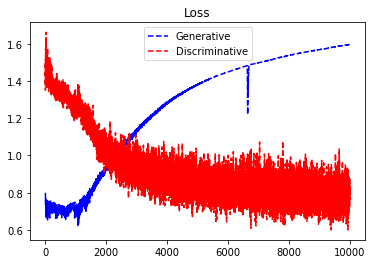

right


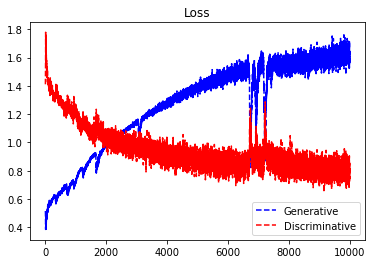

In [7]:
left_X, left_y = X_train[y_train == 0], y_train[y_train == 0]                                       
right_X, right_y = X_train[y_train == 1], y_train[y_train == 1]


print("left")
left_GAN = train_GAN(left_X, left_y)
print("right")
right_GAN = train_GAN(right_X, right_y)

In [11]:
print(left_GAN)

[[4.156028e-39 4.156028e-39 4.156028e-39 ... 1.000000e+00 1.000000e+00
  0.000000e+00]
 [4.156028e-39 4.156028e-39 4.156028e-39 ... 1.000000e+00 1.000000e+00
  0.000000e+00]
 [4.156028e-39 4.156028e-39 4.156028e-39 ... 1.000000e+00 1.000000e+00
  0.000000e+00]
 ...
 [4.156028e-39 4.156028e-39 4.156028e-39 ... 1.000000e+00 1.000000e+00
  0.000000e+00]
 [4.156028e-39 4.156028e-39 4.156028e-39 ... 1.000000e+00 1.000000e+00
  0.000000e+00]
 [4.156028e-39 4.156028e-39 4.156028e-39 ... 1.000000e+00 1.000000e+00
  0.000000e+00]]


In [12]:
print(right_GAN)

[[9.3545174e-29 3.9896249e-23 1.1364436e-21 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [2.1687558e-32 1.8302165e-24 9.2209427e-23 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [4.1560284e-39 2.7581983e-34 4.1563618e-31 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 ...
 [4.1560284e-39 2.7639583e-35 4.0847006e-32 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [5.8271699e-22 1.8450771e-17 5.6651019e-16 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [9.7458344e-23 3.7164354e-19 2.4817337e-17 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]]


In [22]:
print(X_train)
print(y_train)
print(left_GAN.shape)

[[-4.39 -3.55 -0.47 ... -2.64 -5.31 -5.97]
 [-0.11  0.58 -0.46 ... -1.68 -1.02 -0.48]
 [ 0.73  0.36 -2.18 ...  1.21  0.51  1.03]
 ...
 [-0.2  -1.71 -0.42 ...  5.41  5.03  4.14]
 [-2.08 -2.56 -2.43 ... -2.54 -3.19 -4.83]
 [-0.65 -0.36  0.44 ...  3.75  2.49 -0.04]]
[1 0 1 0 0 1 0 1 0 1 0 1 1 1 0 0 0 0 1 1 0 1 1 0 1 0 1 1 1 1 0 1 0 0 1 1 1
 1 1 0 0 1 0 1 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 0 0 0 1 1
 1 1 1 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 1 0 1
 1 1 0 1 1 0 1 1 0 1 0 1 0 0 0 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0
 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 1 0 0 1 0 0 1 1 1 0
 1 0 0 1 0 0 0 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 0 0 1 0 0 1 0 1 1 1 1 1 1
 0 0 1 0 1 0 1 1 1 1 1 1 0 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 1 1 1 0 0 0 0 1 1
 0 0 1 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 0 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 0 0 1 1 0 1 1 1 1 0 1 0 0 1 1 1 0 1 0 1 1 0 1 0 0 1 1 1 1 1 1
 1 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 0 1 1 0 0 1 1 1 

In [8]:
GAN_data = np.append(right_GAN,  left_GAN, axis = 0)
GAN_labels = np.append(np.ones(100),  np.zeros(100))
print(GAN_data.shape)
GANX = np.append(GAN_data, X_train, axis = 0)
GANY = np.append(GAN_labels, y_train)
classify(X_train, y_train, X_test, y_test)
print(X_train.shape)
print(y_train.shape)
print(GANX.shape)
print(GANY.shape)
classify(GANX, GANY, X_test, y_test)


(200, 90)
0.6511627906976745
(513, 90)
(513,)
(713, 90)
(713,)
0.6434108527131783


/Users/thomasklimek/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/thomasklimek/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [1]:
print(X_train.shape)
print(GAN_data.shape)
print(np.mean(GAN_data, axis = 0))
print(np.mean(X_train, axis = 0))

NameError: name 'X_train' is not defined